# **Hierarchal Clustering for the La Liga in Python**

In [4]:
import pandas as pd

In [86]:
# data from Fbref - 30/08/2022
df = pd.read_excel('laliga_3rd_round.xlsx')
df.head()

,Squad,Possession,Min,90s,Goals,xG,xA,npxG,Pressures,% succ pressures,Progressive passes,Shots,Shots on target,Shots on target %,npxG/Shot,% Duels won
0,Almeria,37.0,270,3.0,1.33,1.18,0.74,1.18,455,18.2,62,34,18,52.9,0.10,54.1
1,Athletic Club,54.7,270,3.0,1.67,1.02,0.90,1.02,264,28.4,87,55,16,29.1,0.06,59.4
2,Atletico Madrid,46.0,270,3.0,1.33,0.84,0.69,0.84,279,24.0,72,38,17,44.7,0.07,47.7
3,Barcelona,65.0,270,3.0,2.67,2.43,1.53,2.43,385,29.9,147,61,21,34.4,0.12,64.1
4,Betis,60.0,270,3.0,2.00,1.87,0.75,1.34,411,29.7,92,30,10,33.3,0.14,50.6


In [ ]:
df.info()

In [88]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import normalize, scale
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [89]:
for team in df["Squad"]:
    print(team)

Almeria
Athletic Club
Atletico Madrid
Barcelona
Betis
Cadiz
Celta Vigo
Elche
Espanyol
Getafe
Girona
Mallorca
Osasuna
Rayo Vallecano
Real Madrid
Real Sociedad
Sevilla
Valencia
Valladolid
Villarreal


In [91]:
# Initialise the encoder
label_encoder = LabelEncoder()
df["Squad"] = label_encoder.fit_transform(df["Squad"])

In [92]:
df.columns

Index(['Squad', 'Possession', 'Min', '90s', 'Goals', 'xG', 'xA', 'npxG',
       'Pressures', '% succ pressures', 'Progressive passes', 'Shots',
       'Shots on target', 'Shots on target %', 'npxG/Shot', '% Duels won'],
      dtype='object')

In [93]:
df = df[['Squad', 'Possession', 'Goals', 'xG','npxG',
       'Pressures', '% succ pressures', 'Progressive passes', 'Shots',
       'Shots on target', 'npxG/Shot', '% Duels won']]

In [94]:
df_normalised = normalize(df)

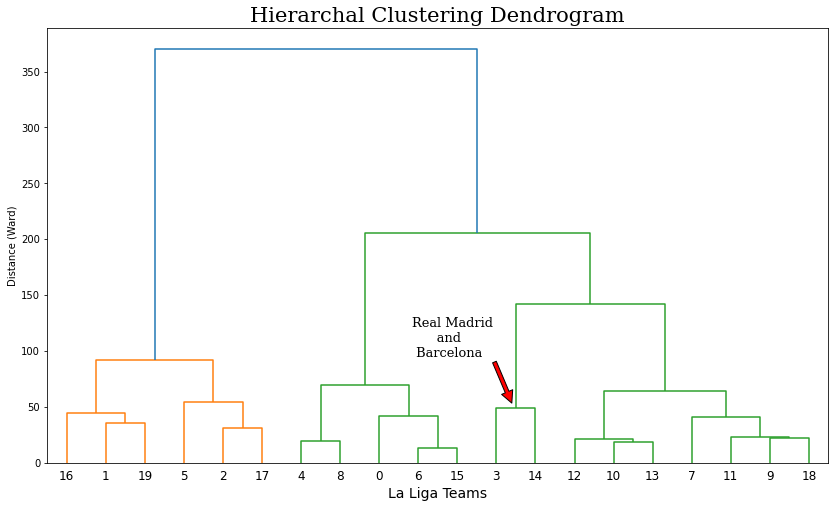

In [95]:
# Dendrogram

plt.figure(figsize=(14,8))

plt.title("Hierarchal Clustering Dendrogram",fontsize=21,fontfamily='serif')
plt.xlabel("La Liga Teams",fontsize=14)
plt.ylabel("Distance (Ward)")

dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))

plt.annotate('Real Madrid\n      and  \n Barcelona',fontsize=13,fontfamily='serif',color ='black',xy=(119, 53), xytext=(93.5, 95),
             arrowprops=dict(facecolor='red', shrink=0.01),
             )

plt.savefig('laliga_3rd_round_dendogram.png',dpi=500,bbox_inches = 'tight',facecolor='white')

0 - Almeria  /  1 - Athletic Club

2 - Atletico Madrid / 3 - Barcelona

4 - Betis / 5 - Cadiz

6 - Celta Vigo / 7 - Elche

8 - Espanyol / 9 - Getafe

10 - Girona / 11 - Mallorca

12 - Osasuna
 / 13 - Rayo Vallecano

14 - Real Madrid
/ 15 - Real Sociedad

16 - Sevilla
/ 17 - Valencia

18 - Valladolid
/ 19 - Villarreal    








**Silhouette** refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [18]:
# perform hierarchal clustering on unnormalised data

hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')


y_pred = hc.fit_predict(df)

silhouette_score(df,y_pred)

0.4544644930482583